# College Scorecard Data Analysis (Fall '17 - '18)

***

#### About
This project aims to conduct a high level survey of the US Education System as of the academic year 2017 - 2018. Our analysis will be structured. In that, we will follow a question and answer format. First we will pose a question; then we will use Python and its Data Processing libraries to create informative Visualizations and relevant Summary Statistics that try to answer our question. Initially we will stick to answering questions about a single variable at a time, followed by two at a time and finally broaden our perspective to consider interaction between three or more variables.

#### The Data
The Data used here was gathered under the [College Scorecard Project](https://collegescorecard.ed.gov/) by the U. S. Department of Education. <br>
The College Scorecard Project was inititated in a bid to increase transparency, putting the power in the hands of students and families to compare how well individual postsecondary institutions were preparing their students to be successful. This project provided data to help students and families compare college costs and outcomes as they weighed the tradeoffs of different colleges, accounting for their own needs and educational goals.

#### Dependencies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile, io

***
## Contents:
## 1. [Wrangling the Data](#Wrangling-the-Data)
## 2. [Data Description](#Data-Description)
## 3. [Assessing and Cleaning](#Assessing-and-Cleaning)
## 4. [Analyzing](#Analysis)
## 5. [Limitations](#Limitations)
## 6. [Conclusions](#Conclusions)

***

## Wrangling the Data

Use the [URL](https://catalog.data.gov/dataset/college-scorecard) for College Scorecard Raw Data from www.data.gov to download the file: `CollegeScorecare_Raw_Data.zip`. Unzip the data into a folder called `data`.

_Note: Preferably create the folder_`data`_in a parent directory since the extracted data is about 2.5 GB in size. Using Version Control to track such a large folder and pushing it to a repository will soon turn into a headache._ <br><br>
Here is the Python code to do the same:

In [ ]:
folder_name = r'../data'

# make a folder if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# pass the url for the zipfile from data.gov
url = r'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
response = requests.get(url, stream = True)

# extract contents
with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    for elem in zf.namelist():
        zf.extract(elem, '../data')

For this analysis, we will be using the data for the **Academic Year 2017-18** as reported by all the [Integrated Postsecondary Education Data System (IPEDS)](https://nces.ed.gov/ipeds/) institutions. <br> The data resides in a csv file called: `MERGED2017_18_PP.csv`

In [ ]:
df_raw = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', low_memory = False)

***

## Data Description

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Columns: 1986 entries, UNITID to SCUGFFN_POOLED
dtypes: float64(1931), int64(12), object(43)
memory usage: 107.8+ MB


The raw data comprises of 1977 columns. The structure of the data violates the definition of Tidy Data according to Hadely Wickham's Paper on Tidy Data [here](https://www.jstatsoft.org/article/view/v059i10). <br> Due to this reason, many columns are not variable names; instead, they are possible values. This drastically increases the number of columns in the dataset. In short, the number of variables is far fewer than the number of columns in the dataset.

For this Analysis, we will be selecting a subset of the variables. You can go through the [full documentation](https://collegescorecard.ed.gov/data/documentation/) to figure out which variables strike as most interesting to you.


Here, I have selected the following variables:

- __UNITID__: <br>Data files are provided at the UNITID level, which is the unique identification number assigned to postsecondary institutions as surveyed through IPEDS - Integrated Postsecondary Education Data System.


- __INSTNM__: <br>The institution’s name, as reported in IPEDS.


- __CITY, STABBR__: <br>As reported in IPEDS.


- __NUMBRANCH__: <br>This variable identifies the number of branch campuses at that institution.


- __HIGHDEG__: <br>Highest award identifies the highest award level conferred at the institution.


- __PREDDEG__: <br>Predominant undergraduate award identifies the type of award that the institution primarily confers; for instance, an institution that awards 40 percent bachelor’s degrees, 30 percent associate degrees, and 30 percent certificate programs would be classified as predominantly bachelor’s degree awarding.


- __CONTROL__: <br>This element is reported directly to IPEDS, and identifies whether the institution’s governance structure is public, private nonprofit, or private for-profit.


- __DISTANCEONLY__: <br>Institutions are identified as distance education-only if all their programs are available only via distance education.


- __TUITFTE__: <br>The net tuition revenue per full-time equivalent (FTE) student uses tuition revenue minus discounts and allowances, and divides that by the number of FTE undergraduate and graduate students.


- __AVGFACSAL__: <br>The average faculty salary produces the average faculty salary per month, by dividing the total salary outlays by the number of months worked for all full-time, nonmedical instructional staff.


- __ADM_RATE_ALL__: <br>Colleges report to IPEDS their Fall admissions rate, defined as the number of admitted undergraduates divided by the number of undergraduates who applied. ADM_RATE_ALL represents the admissions rate across all campuses, defined as the total number of admitted undergraduates across all branches divided by the total number of undergraduates who applied across all branches.


- __SATVR25, SATVR75, SATMT25, SATMT75, ACTCM25, ACTCM75__: <br>The files include the 25th and 75th percentiles of SAT reading (SATVR* for _25 and _75), writing (SATWR* for _25 and _75), math (SATMT* for _25 and _75) <br> NOTE: Data for SATWR is absent and the corresponding columns should be dropped.


- __UGDS__: <br>This element includes the number of degree/certificate-seeking undergraduates enrolled in the fall, as reported in the IPEDS Fall Enrollment component.


- __UG25ABV__: <br>This element identifies the share of students enrolled as of the institutions official fall census date (or October 15 of the IPEDS collection year, whichever is earlier) who are ages 25 and over.


- __PCTFLOAN__: <br>This element, as reported in the IPEDS Student Financial Aid (SFA) component, shows the share of undergraduate students who received federal loans in a given year.


- __CDR3__: <br>Cohort default rates are produced annually as an institutional accountability metric; institutions with high default rates may lose access to federal financial aid. The three-year cohort default rate (CDR3) represents a snapshot in time.

Lets select these variables of interest from the `df_raw` and store it in `df`:

In [ ]:
cols_of_interest = ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'NUMBRANCH', 'HIGHDEG', 'PREDDEG', 'CONTROL', 'DISTANCEONLY',
                    'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25',
                    'ACTCM75', 'UGDS', 'UG25ABV', 'PCTFLOAN', 'CDR3']

data_of_interest = df_raw[cols_of_interest]

In [ ]:
data_of_interest.shape

(7112, 22)

_______________________________________________________________________________________________________________________________

## Assessing and Cleaning

Here we will address the quality and tidiness issues of our data.

In [ ]:
df_clean = data_of_interest.copy()

#### Turn column names to lower case:

In [ ]:
df_clean.rename( columns = lambda col: col.strip().lower(), inplace = True )

#### Check for NULL entries:

In [ ]:
df_clean.isnull().any()

unitid          False
instnm          False
city            False
stabbr          False
numbranch       False
highdeg         False
preddeg         False
control         False
distanceonly     True
tuitfte          True
avgfacsal        True
adm_rate_all     True
satvr25          True
satvr75          True
satmt25          True
satmt75          True
actcm25          True
actcm75          True
ugds             True
ug25abv          True
pctfloan         True
cdr3             True
dtype: bool

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7112 entries, 0 to 7111
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   unitid        7112 non-null   int64  
 1   instnm        7112 non-null   object 
 2   city          7112 non-null   object 
 3   stabbr        7112 non-null   object 
 4   numbranch     7112 non-null   int64  
 5   highdeg       7112 non-null   int64  
 6   preddeg       7112 non-null   int64  
 7   control       7112 non-null   int64  
 8   distanceonly  6668 non-null   float64
 9   tuitfte       6649 non-null   float64
 10  avgfacsal     4245 non-null   float64
 11  adm_rate_all  2250 non-null   float64
 12  satvr25       1238 non-null   float64
 13  satvr75       1238 non-null   float64
 14  satmt25       1238 non-null   float64
 15  satmt75       1238 non-null   float64
 16  actcm25       1295 non-null   float64
 17  actcm75       1295 non-null   float64
 18  ugds          6364 non-null 

There seem to be a lot of NULL values for the SAT and ACT data. This will be a potential caveat during the analysis.

#### Many Categorical variables have been encoded as Numeric, as evident from the documentation. Let's convert those back:

- **`stabbr`**:

In [ ]:
df_clean.stabbr.unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI', 'IA', 'KS',
       'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [ ]:
df_clean.stabbr.nunique()

59

59? Last time I checked, the US had 50 states. Lets investigate this further. <br>Here is a list of all the states according to Wikipedia:

In [ ]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
         'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
         'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [ ]:
len(states)

50

Lets isolate the additional 9 elements in `stabbr`:

In [ ]:
# use sets
set(df_clean.stabbr.unique()) - set(states)

{'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI'}

A quick Google search shows that these 9 abbreviations are Commonwealth/Territories. <br>We can conclude that all values in the `stabbr` column are valid.

Next, lets convert this column to type Categorical:

In [ ]:
l = list(df_clean.stabbr.unique())

df_clean['stabbr'] = pd.Categorical(df_clean.stabbr, categories = l, ordered = False)

In [ ]:
df_clean.stabbr.dtype

CategoricalDtype(categories=['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT',
                  'NY', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI',
                  'IA', 'KS', 'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT',
                  'NE', 'NV', 'NH', 'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR',
                  'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WI',
                  'WY', 'AS', 'GU', 'MP', 'PR', 'FM', 'PW', 'VI', 'MH'],
, ordered=False)

- __`highdeg`__ and __`preddeg`__:

In [ ]:
df_clean.highdeg.unique()

array([4, 2, 3, 1, 0])

In [ ]:
df_clean.preddeg.unique()

array([3, 2, 1, 4, 0])

From the documentation, both the columns map the numeric value to categorical value as follows: <br>
    - 4 : Graduate's Degree
    - 3 : Bachelor's Degree
    - 2 : Associate's Degree
    - 1 : Certificate
    - 0 : N/A

In [ ]:
# replace the numeric encodings by their categorical value as above
df_clean['highdeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's",
                                                       4:"Graduate's"},
                                         inplace = True)

df_clean['preddeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's",
                                                       4:"Graduate's"},
                                         inplace = True)

In [ ]:
df_clean.highdeg.value_counts(), df_clean.preddeg.value_counts()

(Certificate    2279
 Graduate's     2052
 Associate's    1518
 Bachelor's      788
 Name: highdeg, dtype: int64,
 Certificate    3011
 Bachelor's     2109
 Associate's    1234
 Graduate's      310
 Name: preddeg, dtype: int64)

Let's compare the value counts with the original dataframe:<br>
    - 4 : Graduate's Degree
    - 3 : Bachelor's Degree
    - 2 : Associate's Degree
    - 1 : Certificate
    - 0 : N/A

In [ ]:
df_raw.HIGHDEG.value_counts(), df_raw.PREDDEG.value_counts()

(1    2279
 4    2052
 2    1518
 3     788
 0     475
 Name: HIGHDEG, dtype: int64,
 1    3011
 3    2109
 2    1234
 0     448
 4     310
 Name: PREDDEG, dtype: int64)

Looks fine.

Now lets convert to categorical values according to the mapping:

In [ ]:
df_clean['highdeg'] = pd.Categorical(df_clean.highdeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

In [ ]:
df_clean['preddeg'] = pd.Categorical(df_clean.preddeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

- __`control`__:

In [ ]:
df_clean.control.value_counts()

3    2995
1    2076
2    2041
Name: control, dtype: int64

From the documentation, the mapping is as follows:
    - 1 : Public
    - 2 : Private Nonprofit
    - 3 : Private For-Profit

In [ ]:
df_clean.control.replace(to_replace = {1: 'Public', 2: 'Private Nonprofit', 3: 'Private For-Profit'}, inplace = True)

In [ ]:
df_clean['control'] = pd.Categorical(df_clean.control, categories = ['Public', 'Private Nonprofit', 'Private For-Profit'],
                                    ordered = False)

In [ ]:
df_clean.control.value_counts()

Private For-Profit    2995
Public                2076
Private Nonprofit     2041
Name: control, dtype: int64

- **`distanceonly`**:

In [ ]:
df_clean.distanceonly.value_counts()

0.0    6615
1.0      53
Name: distanceonly, dtype: int64

From the documentation:
    - 0 : No
    - 1 : Yes

In [ ]:
df_clean.distanceonly.replace(to_replace = {0.0: 'No', 1.0: 'Yes'}, inplace = True)

In [ ]:
df_clean['distanceonly'] = pd.Categorical(df_clean.distanceonly, categories = ['No', 'Yes'], ordered = False)

In [ ]:
df_clean.distanceonly.value_counts()

No     6615
Yes      53
Name: distanceonly, dtype: int64

- **`ugds`**:

UGDS is the number of Undergraduate students that enroll in an academic year. <br>
This variable in the dataset has datatype `float`:

In [ ]:
df_clean.ugds.dtype

dtype('float64')

Ideally it should be converted to dtype `int`, however the inability to convert a column having NaNs to dtype int is one of the known [limitations of Pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#support-for-integer-na). <br> For that reason we will leave the datatype as it is.

- Other variables: <br><br>
The rest of the variables have the proper dtype. Lets save this cleaned dataframe:

In [ ]:
df_clean.to_csv('MERGED_2017_2018_cleaned.csv', index = None)

_______________________________________________________________________________________________________________________________

## Analysis

#### The Analysis is broken down into three logical steps:
#### 1. [Univariate Explorations](#Univariate-Explorations)
#### 2. [Bivariate Explorations](#Bivariate-Explorations)
#### 3. [Multivariate Explorations](#Multivariate-Explorations)

Lets read in the cleaned dataframe:

In [ ]:
df = df_clean.copy()

In [ ]:
df.head()

,unitid,instnm,city,stabbr,numbranch,highdeg,preddeg,control,distanceonly,tuitfte,...,satvr25,satvr75,satmt25,satmt75,actcm25,actcm75,ugds,ug25abv,pctfloan,cdr3
0,100654,Alabama A & M University,Normal,AL,1,Graduate's,Bachelor's,Public,No,9227.0,...,365.0,485.0,360.0,495.0,16.0,19.0,4824.0,0.0758,0.7697,0.198
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,Graduate's,Bachelor's,Public,No,11612.0,...,440.0,630.0,550.0,740.0,21.0,28.0,12866.0,0.2296,0.5207,0.059
2,100690,Amridge University,Montgomery,AL,1,Graduate's,Bachelor's,Private Nonprofit,Yes,14738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,318.0,0.8302,0.8741,0.128
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,Graduate's,Bachelor's,Public,No,8727.0,...,550.0,660.0,530.0,670.0,25.0,31.0,6917.0,0.1842,0.4278,0.074
4,100724,Alabama State University,Montgomery,AL,1,Graduate's,Bachelor's,Public,No,9003.0,...,380.0,485.0,375.0,481.0,16.0,20.0,4189.0,0.0848,0.7690,0.211


_______________________________________________________________________________________________________________________________

### Univariate Explorations

Here we will look at distributions of the variables and try to answer some preliminary questions about the data.

#### Q. How are institutes spread out across the US?

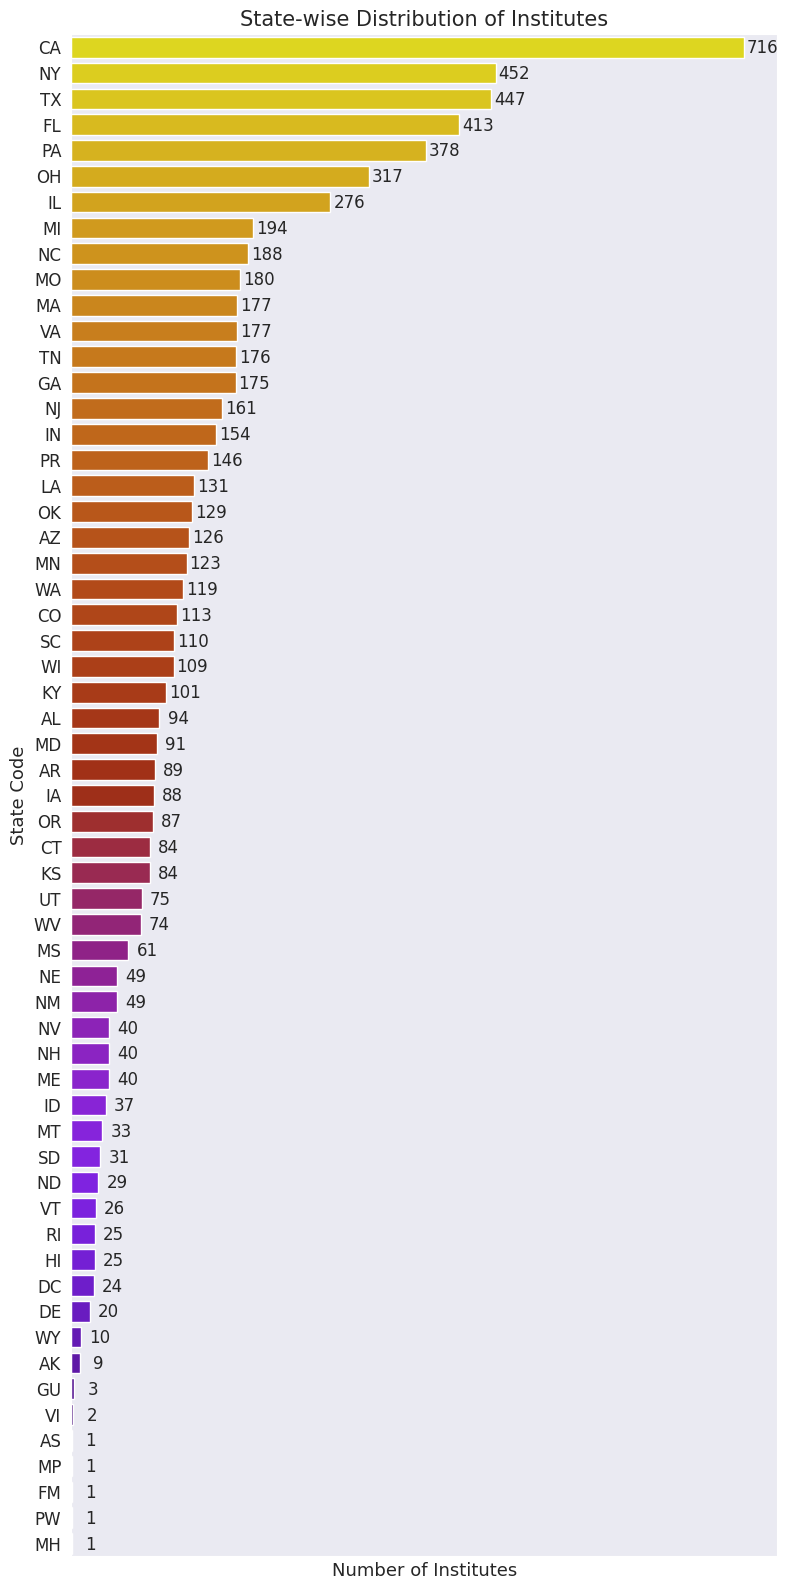

In [ ]:
sb.set_style('dark')
plt.figure(figsize = (8, 16))

# plot
ax = sb.barplot(x=df.stabbr.value_counts().values,
                y=list(df.stabbr.value_counts().index),
                palette = sb.color_palette('gnuplot_r', len(df.stabbr.value_counts())))

# annotate the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize = 12)

# label the plot
plt.title('State-wise Distribution of Institutes', fontsize = 15)
plt.xlabel('Number of Institutes', fontsize = 13)
plt.ylabel('State Code', fontsize = 13)
plt.xticks([], [])
plt.yticks(fontsize = 12)

plt.tight_layout();

> - The state of California (CA) has by far the greatest number of institutes. <br><br>
> - The states of New York (NY), Texas (TX), Florida (FL), Pennsylvania (PA), Ohio (OH) and Illinois (IL) have closely competing numbers. <br><br>
> - The number of institutes in the rest of the states show a gradual decrease as seen in the figure. <br><br>
> - Of the Commonwealth/Territories only the District of Columbia (DC), and Puerto Rico (PR) have a significant number of universities. The rest have a single university each.

_______________________________________________________________________________________________________________________________

#### Q.  What is the median number of branches per Institute?

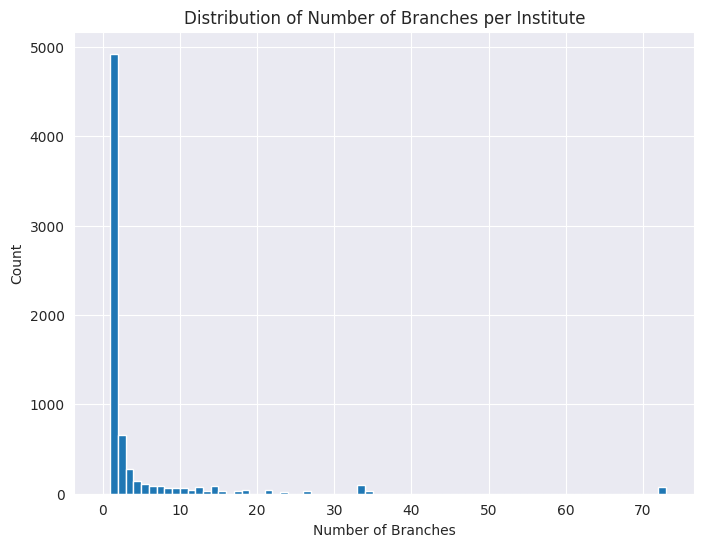

In [ ]:
sb.set_style('darkgrid')

# specify the bins
bins = np.arange(0, df.numbranch.max() + 1, 1)

# plot
plt.figure(figsize = (8,6))
plt.hist(data = df, x = 'numbranch', bins = bins)

# label
plt.title('Distribution of Number of Branches per Institute')
plt.xlabel('Number of Branches')
plt.ylabel('Count');

In [ ]:
print("Percentage of all Universities having a single branch: {0:.2f}".format(len(df.query('numbranch == 1'))/len(df) * 100))
print("The median number of branches per institute: {0:.0f}".format(df.numbranch.median()))

Percentage of all Universities having a single branch: 69.21
The median number of branches per institute: 1


Let's look at the outlier past the `numbranch` = 70 mark:

In [ ]:
df.query('numbranch > 70')

,unitid,instnm,city,stabbr,numbranch,highdeg,preddeg,control,distanceonly,tuitfte,...,satvr25,satvr75,satmt25,satmt75,actcm25,actcm75,ugds,ug25abv,pctfloan,cdr3
651,131803,Strayer University-District of Columbia,Washington,DC,73,Graduate's,Bachelor's,Private For-Profit,No,14079.0,...,NaN,NaN,NaN,NaN,NaN,NaN,687.0,0.8726,0.7210,0.106
3697,233684,Strayer University-Virginia,Arlington,VA,73,Graduate's,Bachelor's,Private For-Profit,No,13950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4256.0,0.8862,0.5652,0.106
4677,430184,Strayer University-Maryland,Suitland,MD,73,Graduate's,Bachelor's,Private For-Profit,No,13615.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2286.0,0.8875,0.6647,0.106
5024,443766,Strayer University-Tennessee,Memphis,TN,73,Graduate's,Bachelor's,Private For-Profit,No,12700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2049.0,0.8367,0.8790,0.106
5025,443784,Strayer University-Pennsylvania,Trevose,PA,73,Graduate's,Bachelor's,Private For-Profit,No,13533.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1788.0,0.8362,0.7827,0.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,45897304,Strayer University-Plano,Plano,TX,73,NaN,NaN,Private For-Profit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106
7077,45897305,Strayer University-Cedar Hill,Cedar Hill,TX,73,NaN,NaN,Private For-Profit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106
7078,45897306,Strayer University-North Dallas,Dallas,TX,73,NaN,NaN,Private For-Profit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106
7079,45897307,Strayer University-San Antonio,San Antonio,TX,73,NaN,NaN,Private For-Profit,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.106


We can see these branches are part of 'Strayer University'. Let's look at how these branches are distributed across different states:

In [ ]:
# Since this is a categorical variable, plotting a bar chart directly will include all the states, even if they have
# no branches. For this reason, we need to explicitly specify which states to plot for along with the number of branches.

# Include only the states that have at least one Strayer University branch
list_of_states = [df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).index[i] for
 i in range(0, df.stabbr.nunique()) if
 df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).values[i] > 0]

# Include the number of branches only if that number is more than zero
list_of_counts =  [df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).values[i] for
  i in range(0, df.stabbr.nunique()) if
  df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).values[i] > 0]

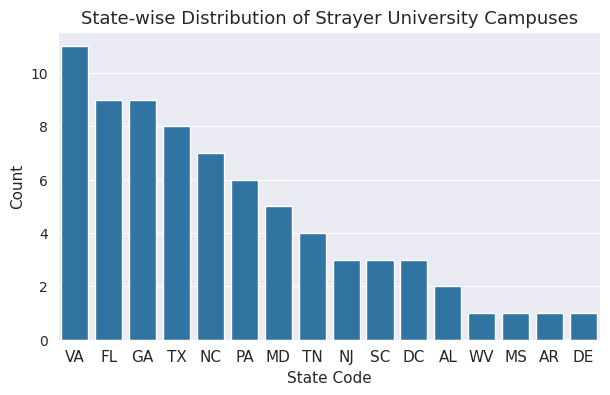

In [ ]:
# plot
plt.figure(figsize = (7, 4))
sb.barplot(x = list_of_states,
           y = list_of_counts,
          color = sb.color_palette()[0])

# label
plt.title('State-wise Distribution of Strayer University Campuses', fontsize = 13)
plt.xlabel('State Code', fontsize = 11)
plt.ylabel('Count', fontsize = 11)
plt.xticks(fontsize = 11);

> - The median number of branches per Institute in the US is 1. <br><br>
> - Strayer University has the highest number of branches. <br><br>
> - The branches of Strayer University are spread across 16 states with the greatest number being in the state of Virginia.

_______________________________________________________________________________________________________________________________

#### Q. Is a Graduate Degree the most predominant award conferred at institutes? <br><br>  Q. If not, which award is?  <br><br> Q. What is the distribution of Bachelors' Degrees like, in that, are they commonly predmoinant or are they highest?

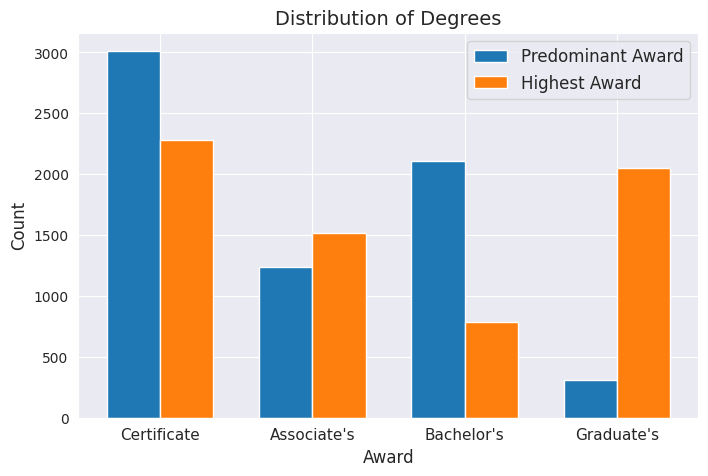

In [ ]:
# initialize the number of categories to plot
N = 4

# separate out the counts for preddeg and highdeg
preddeg_counts = df.preddeg.value_counts(sort = False).values
highdeg_counts = df.highdeg.value_counts(sort = False).values

# get the locations to plot bars at and specify the width of each bar
ind = np.arange(N)
width = 0.35

# specify the color palettes and make subplots for each preddeg and highdeg
c1, c2 = sb.color_palette()[0], sb.color_palette()[1]
fig, ax = plt.subplots(figsize = (8,5))

# plot
rects1 = ax.bar(ind, preddeg_counts, width, color = c1)
rects2 = ax.bar(ind + width, highdeg_counts, width, color = c2)

# specify the tick locations
ax.set_xticks(ind + width / 2)

# label
ax.set_xticklabels(("Certificate", "Associate's", "Bachelor's", "Graduate's"), fontsize = 11)
ax.legend( (rects1[0], rects2[0]), ('Predominant Award', 'Highest Award'), fontsize = 12 )
plt.title('Distribution of Degrees', fontsize = 14)
plt.xlabel('Award', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [ ]:
df.groupby(['preddeg', 'highdeg']).size().reset_index(name = 'count')

,preddeg,highdeg,count
0,Certificate,Certificate,2279
1,Certificate,Associate's,632
2,Certificate,Bachelor's,56
3,Certificate,Graduate's,36
4,Associate's,Certificate,0
5,Associate's,Associate's,886
6,Associate's,Bachelor's,290
7,Associate's,Graduate's,53
8,Bachelor's,Certificate,0
9,Bachelor's,Associate's,0


We will study the relationship between `preddeg` and `highdeg` in more detail when we produce bivariate visualizations ahead.

For now, we can draw the following conclusions:

> - Graduate's Degree is rarely the predominant award conferred. The institutes that confer Graduate Degrees predominantly though, also have their highest award as the same. These institutes exclusively offer Graduate Degrees only. <br><br>
> - A Certificate is the most predominantly conferred award. It is clear that most institutes that have their predominant award as a Certificate, also have their Highest award as the same. <br><br>
> - Few universities have Bachelor's Degree as their highest award. However, Bachelor's being the predominant award is fairly common.

_______________________________________________________________________________________________________________________________

#### Q. Which type of governance structure is the most common in the US across institutes?

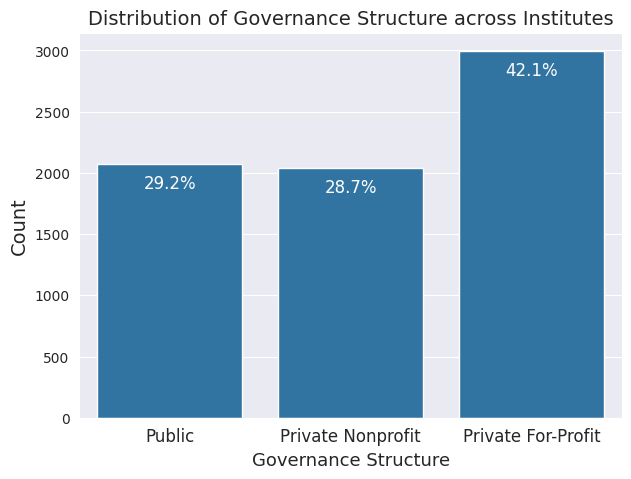

In [ ]:
# plot
plt.figure(figsize = (7, 5))
sb.countplot(data = df, x = 'control', color = sb.color_palette()[0])

# annotate
n_points = df.shape[0]
cat_counts = df.control.value_counts()
locs, labels = plt.xticks()                # get current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_points)

    # print the annotations below the top of the bar
    plt.text(loc, count-200, pct_string, ha = 'center', color = 'w', fontsize = 12)

# label
plt.title('Distribution of Governance Structure across Institutes', fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel("Governance Structure", fontsize = 13)
plt.ylabel('Count', fontsize = 14);

> - Private For-Profit Schools are the most common in the US. There are about 30% more Private For-Profits than there are Public or Private Nonprofits. <br><br>
> - The number of Public or Private Nonprofit Schools in the US is approximately the same.

_______________________________________________________________________________________________________________________________

#### Q. How much do Institutions in the US make per student as tuition fee?

In [ ]:
df.tuitfte.describe()

count      6649.000000
mean      10769.523989
std       12533.925383
min           0.000000
25%        4918.000000
50%        9157.000000
75%       13920.000000
max      712078.000000
Name: tuitfte, dtype: float64

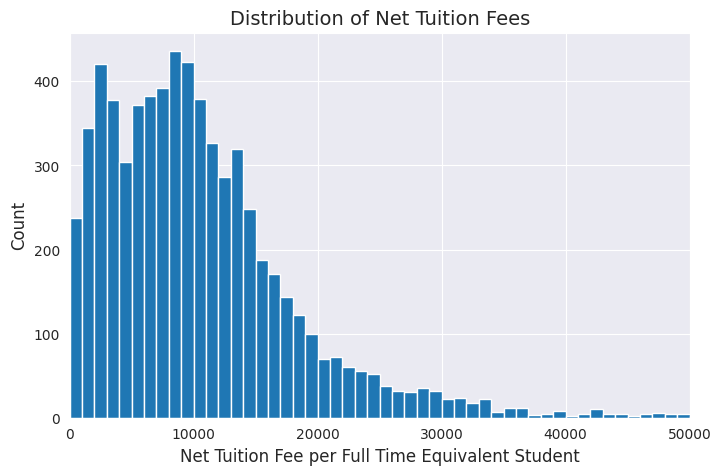

In [ ]:
plt.figure(figsize = (8,5))

# specify the bins
bins = np.arange(0, df.tuitfte.max() + 1000, 1000)

# plot
plt.hist(data = df, x = 'tuitfte', bins = bins);
plt.xlim(0,50000)

# label
plt.title('Distribution of Net Tuition Fees', fontsize = 14)
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - The distribution looks roughly bimodal with modes around 3,000 and 9,000 mark. <br><br>
> - About half of the schools in the US made more than 9,000 per student in the academic year 2017-18. <br><br>
> - About three quarters of the schools made more than 14,000 per student in the academic year 2017-18. <br><br>
> - On average, schools made about 10,700 dollars in the academic year 2017-18 per student.

Lets take a closer look at the institutes that earn less or more than the median amount per student:

In [ ]:
less_than_median = df.query('tuitfte < 9148').groupby('control').size().reset_index(name = 'count: tuitfte less than median')
more_than_median = df.query('tuitfte > 9148').groupby('control').size().reset_index(name = 'count: tuitfte more than median')

less_than_median.merge(more_than_median)

,control,count: tuitfte less than median,count: tuitfte more than median
0,Public,1735,249
1,Private Nonprofit,439,1456
2,Private For-Profit,1145,1623


> - Most of the schools (about 92%) that earn more than the median (9148 dollars) per student are private entities.

Since the distribution is skewed to the right, lets look at the more expensive institutes:

In [ ]:
df.query('tuitfte > 50000')[['instnm', 'city', 'control', 'tuitfte']].sort_values(by = 'tuitfte')

,instnm,city,control,tuitfte
5499,Pacific Northwest University of Health Sciences,Yakima,Private Nonprofit,50572.0
5711,Southern California University SOMA,Los Angeles,Private For-Profit,50648.0
2983,Pennsylvania State University-Dickinson Law,Carlisle,Public,52244.0
2279,The International Culinary Center,New York,Private For-Profit,52585.0
5565,Brown Mackie College-Phoenix,Phoenix,Private For-Profit,52802.0
6594,Los Angeles Academy of Figurative Art,Van Nuys,Private For-Profit,54382.0
5632,Institute of Culinary Education,New York,Private For-Profit,55500.0
5658,Pinchot University,Seattle,Private Nonprofit,57961.0
5440,Ottawa University-Online,Ottawa,Private Nonprofit,58553.0
5215,Institute of Professional Careers,Las Vegas,Private For-Profit,59776.0


> - Most of these institutes are Private. Further, these are predominantly For-Profit. <br><br>
> - The bottom three institutes earn over 100,000 per FTE. These datapoints are errors in all likelyhood. However we cannot ascertain this and for now we will keep them in the dataset.

_______________________________________________________________________________________________________________________________

#### Q. What is the median monthly Faculty Salary?

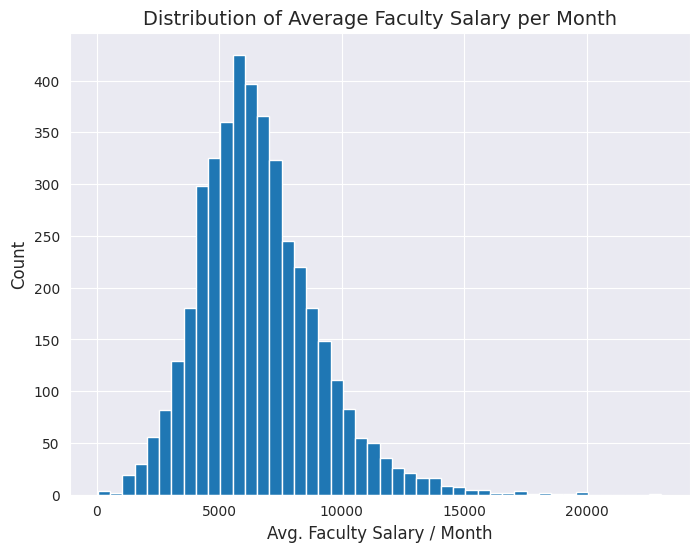

In [ ]:
# specify the bins
bins = np.arange(50, df.avgfacsal.max() + 500, 500)

# plot
plt.figure(figsize = (8, 6))
plt.hist(data = df, x = 'avgfacsal', bins = bins)

# label
plt.title('Distribution of Average Faculty Salary per Month', fontsize = 14)
plt.xlabel('Avg. Faculty Salary / Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [ ]:
print(f'The median Avg. Faculty Salary per month is: {df.avgfacsal.median()}')

The median Avg. Faculty Salary per month is: 6334.0


> - On average, the median faculty salary is 6,377 per month.

_______________________________________________________________________________________________________________________________

#### Q. How is the distribution of admission rates across all institutes? In that, are admission rates on the higher, or lower side in the US?

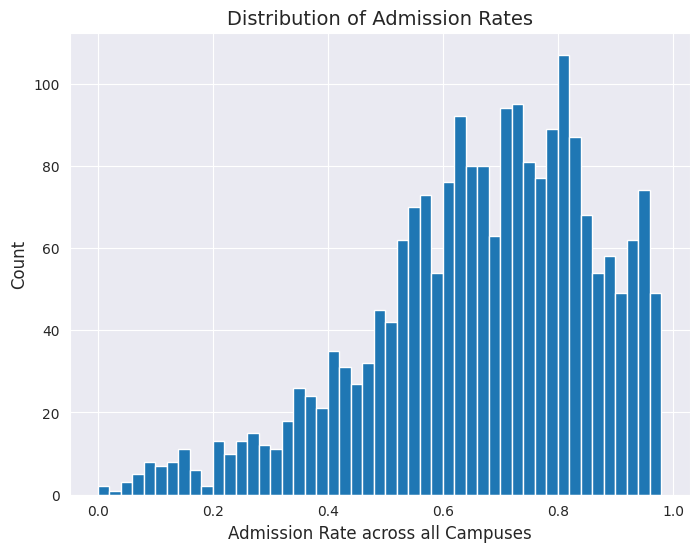

In [ ]:
# specify the bins
bins = np.arange(0, 1, 0.02)

# plot
plt.figure(figsize = (8,6))
plt.hist(data = df, x = 'adm_rate_all', bins = bins)

# label
plt.title('Distribution of Admission Rates', fontsize = 14)
plt.xlabel('Admission Rate across all Campuses', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - The distribution seems to be clustered around certain discrete admission rates. <br><br>
> - Also, it is left skewed which means, schools in the US tend to have admission rates on the higher side.

_______________________________________________________________________________________________________________________________

#### Q. What makes for a _good_ or _bad_ SAT or ACT score?

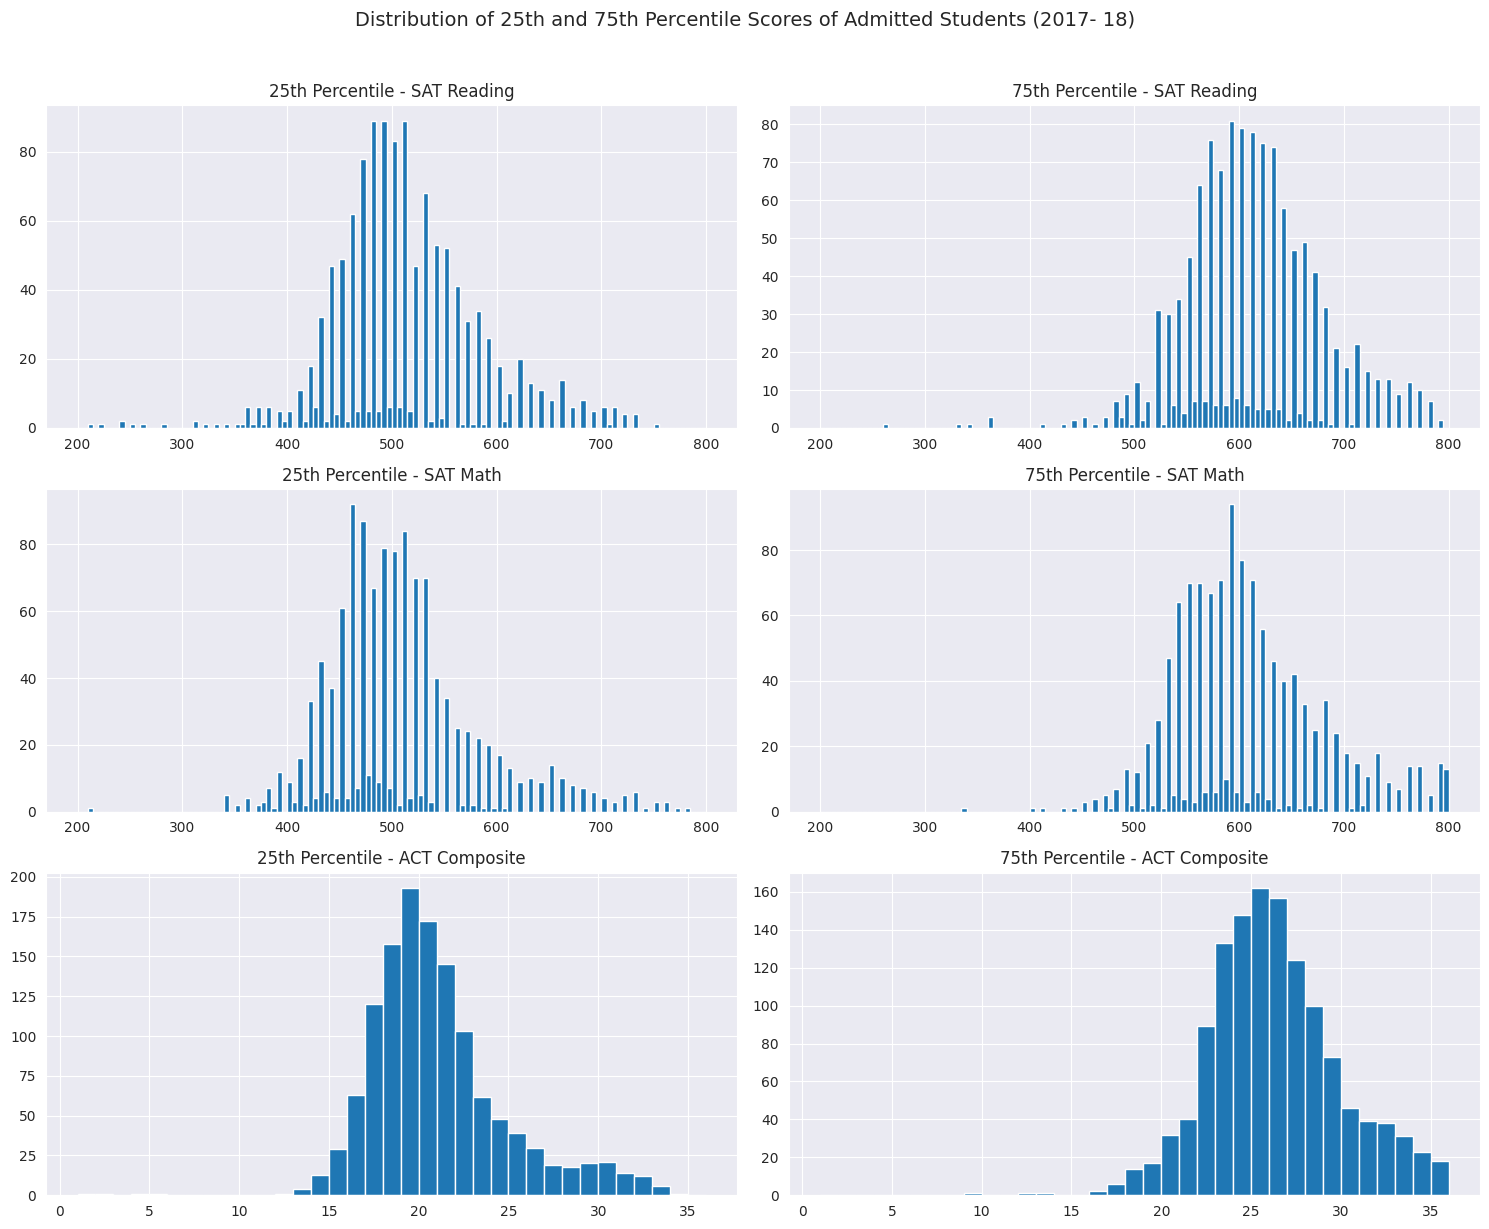

In [ ]:
# function to plot histograms
def hist(series, title, act = False):
    if act == True:
        bins = np.arange(1, 36 + 1, 1)  # the scale for ACTs is 1 - 36
        plt.hist(x = series, bins = bins)
        plt.title(title);
    else:
        bins = np.arange(200, 800 + 5, 5)  # the scale for SATs is 200 - 800
        plt.hist(x = series, bins = bins)
        plt.title(title);


# plot
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
hist(df.satvr25, '25th Percentile - SAT Reading')

plt.subplot(3, 2, 2)
hist(df.satvr75, '75th Percentile - SAT Reading')

plt.subplot(3, 2, 3)
hist(df.satmt25, '25th Percentile - SAT Math')

plt.subplot(3, 2, 4)
hist(df.satmt75, '75th Percentile - SAT Math')

plt.subplot(3, 2, 5)
hist(df.actcm25, '25th Percentile - ACT Composite', act = True)

plt.subplot(3, 2, 6)
hist(df.actcm75, '75th Percentile - ACT Composite', act = True)

plt.suptitle('Distribution of 25th and 75th Percentile Scores of Admitted Students (2017- 18)',
            x = 0.5, y = 1.02, fontsize = 14)
plt.tight_layout();

> - We can see that the SAT scores are clustered in discrete bins. This is most likely due to the peculiarities of the Grading System such as fixed increments. On the other hand ACT scores seem to follow a normal distribution.<br><br>
> - Most universities have their 75th Percentile for both Reading and Math fall around 600. <br><br>
> - Similarly most universities have their 25th Percentile fall around 500. <br><br>
> - From these observations it can be said that _a good **SAT** score falls in the range **500 - 600**_ for both Reading and Math. <br><br>
> - The distribution of ACT Composite Scores is generally normal with skews to the right and left for 25th and 75th percentiles respectively. <br><br>
> - From the observations it can be said that _a good **ACT Composite** score is anywhere between **20 and 26**._

_______________________________________________________________________________________________________________________________

#### Q. What is the distribution of percentage of students who receive federal loans per institute like?

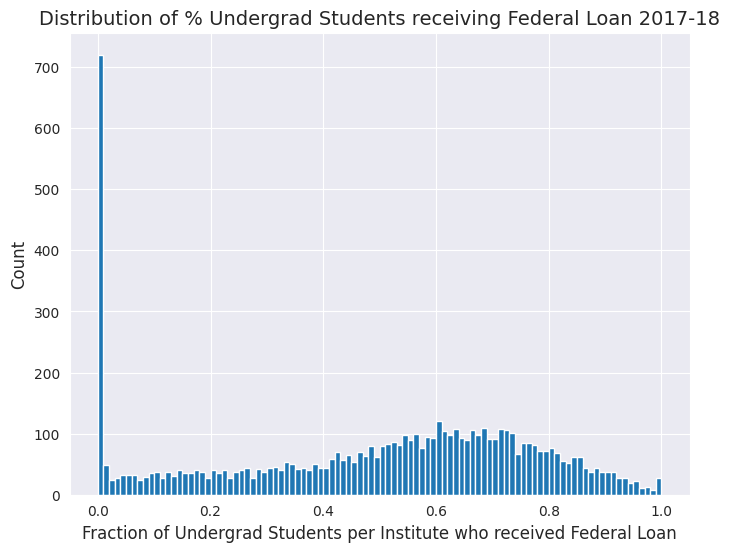

In [ ]:
# specify the bins
bins = np.arange(0, 1 + 0.01, 0.01)

# plot
plt.figure(figsize = (8, 6))
plt.hist(data = df, x = 'pctfloan', bins = bins)

# label
plt.title('Distribution of % Undergrad Students receiving Federal Loan 2017-18', fontsize = 14)
plt.xlabel('Fraction of Undergrad Students per Institute who received Federal Loan', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - There is a large number of institutions (over 700) where almost none of the students received a federal loan. <br><br>
> - There is a decent number of institutions where 50 - 70 percent of the students receive a federal loan.

_______________________________________________________________________________________________________________________________

#### Q. As of the academic year 2017-18, which institutes stand to lose access to federal financial aid?

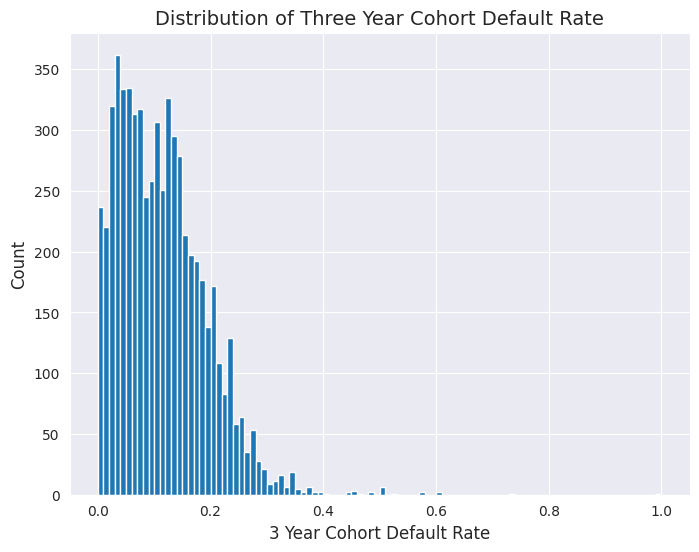

In [ ]:
# specify the bins
bins = np.arange(0, df.cdr3.max() + 0.01, 0.01)

# plot
plt.figure(figsize = (8, 6))
plt.hist(data = df, x = 'cdr3', bins = bins)

# label
plt.title('Distribution of Three Year Cohort Default Rate', fontsize = 14)
plt.xlabel('3 Year Cohort Default Rate', fontsize = 12)
plt.ylabel('Count', fontsize= 12);

In [ ]:
df.query('cdr3 > 0.4')['instnm']

2223                      Cheryl Fells School of Business
2331                        Mirrer Yeshiva Cent Institute
3922                     Universidad Teologica del Caribe
4989                 Family of Faith Christian University
6006                               Larry's Barber College
6013    Tomorrow's Image Barber And Beauty Academy of ...
6101           Ace Cosmetology and Barber Training Center
6143                         Sharp Edgez Barber Institute
6164                     Belle Academy of Cosmetology LLC
6227                            Alamo City Barber College
6265                                  Vibe Barber College
6266                                Champ's Barber School
6279                    Creative Touch Cosmetology School
6280                         LaBarberia Institute of Hair
6288                   Beyond Measure Barbering Institute
6382                          K & G 5 Star Barber College
6408                            San Francisco Film School
6415          

> - Although we cannot determine what constitutes as a 'high' 3-Year Cohort Default Rate without domain knowledge, we can see from the distribution that CDR3 above 0.4 only occurs in isolated instances. We can determine the names of these institutes and tentatively answer our question as to which institutes stand to lose access to federal financial aid. These are listed above.

_______________________________________________________________________________________________________________________________

### Bivariate Explorations

Here we will look for relationships between two variables at a time.

#### Q. How does admission rate of an institute affect the average faculty salary?

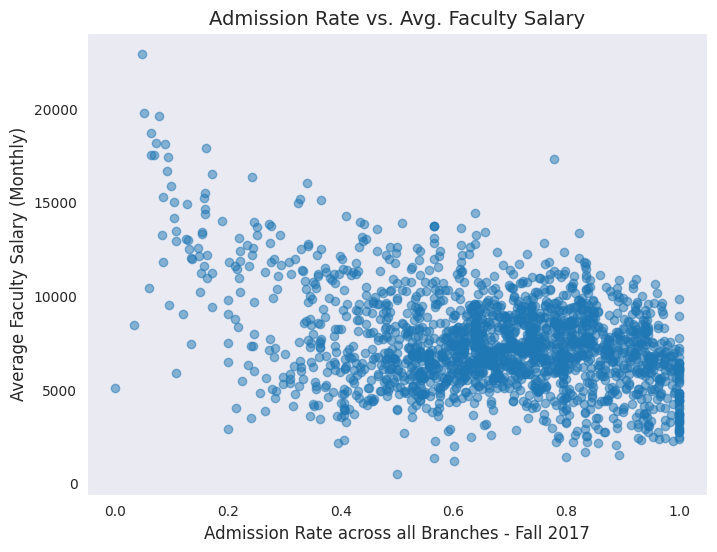

In [ ]:
sb.set_style('dark')

# plot
plt.figure(figsize = (8, 6))
sb.regplot(data = df, x = 'adm_rate_all', y = 'avgfacsal', fit_reg = False, scatter_kws = {'alpha':1/2})

# label
plt.title('Admission Rate vs. Avg. Faculty Salary', fontsize = 14)
plt.xlabel('Admission Rate across all Branches - Fall 2017', fontsize = 12)
plt.ylabel('Average Faculty Salary (Monthly)', fontsize = 12);

Lets get the Pearson's Correlation Coefficient for the plot:

In [ ]:
df[['avgfacsal', 'adm_rate_all']].corr()

,avgfacsal,adm_rate_all
avgfacsal,1.000000,-0.352313
adm_rate_all,-0.352313,1.000000


> - It can be observed that admission rate has a weak negative correlation (r = -0.35) with average faculty salary.

Lets zoom in on the institutes lying approximately in the upper left corner of the scatter plot where the admission rates are low and average faculty salary is high:

In [ ]:
df.query('avgfacsal > 15000 and adm_rate_all < 0.1')[['instnm', 'adm_rate_all', 'avgfacsal']].sort_values(by = 'avgfacsal')

,instnm,adm_rate_all,avgfacsal
3189,Brown University,0.0849,15276.0
2498,Duke University,0.0986,15844.0
1027,Northwestern University,0.0924,16645.0
3107,University of Pennsylvania,0.0930,17435.0
633,Yale University,0.0693,17517.0
2123,Princeton University,0.0641,17519.0
930,University of Chicago,0.0873,18115.0
1575,Massachusetts Institute of Technology,0.0717,18182.0
2233,Columbia University in the City of New York,0.0640,18713.0
212,California Institute of Technology,0.0774,19600.0


> - As one might expect, institutes that have a very low admission rate and a very high average faculty salary are among the most notable institutes in the US.

_______________________________________________________________________________________________________________________________

#### Q. One might expect that institutes having a high 75th percentile of test scores for admitted students, would have low admission rates. Does the data support this assumption?

Here we will plot admission rate vs. 75th percentile scores of admitted students for both SATs and ACTs.

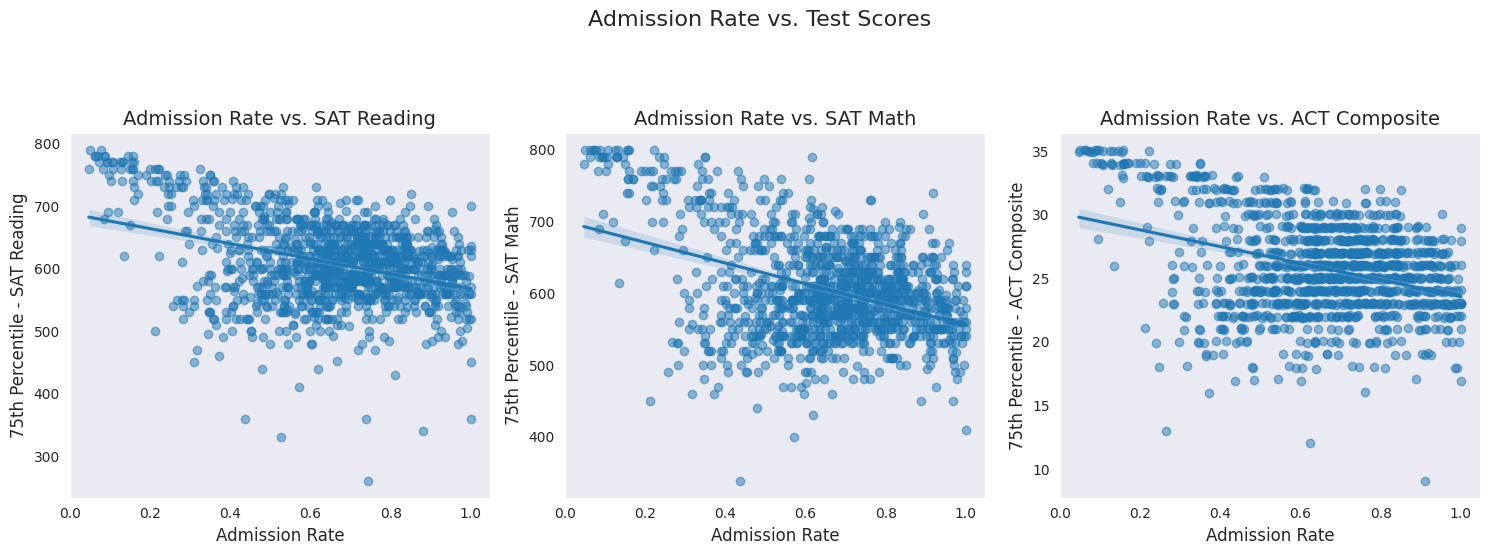

In [ ]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sb.regplot(data = df, x = 'adm_rate_all', y = 'satvr75', scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. SAT Reading', fontsize = 14)
plt.xlabel('Admission Rate', fontsize = 12)
plt.ylabel('75th Percentile - SAT Reading', fontsize = 12)

plt.subplot(1, 3, 2)
sb.regplot(data = df, x = 'adm_rate_all', y = 'satmt75', scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. SAT Math', fontsize = 14)
plt.xlabel('Admission Rate', fontsize = 12)
plt.ylabel('75th Percentile - SAT Math', fontsize = 12)

plt.subplot(1, 3, 3)
sb.regplot(data = df, x = 'adm_rate_all', y = 'actcm75', y_jitter = 0.1, scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. ACT Composite', fontsize = 14)
plt.xlabel('Admission Rate', fontsize = 12)
plt.ylabel('75th Percentile - ACT Composite', fontsize = 12)

plt.suptitle('Admission Rate vs. Test Scores', x = 0.51, y = 1.1, fontsize = 16)
plt.tight_layout();

> - We can see here that institutes that have a low rate of admission tend to have a higher 75th percentile score, regardless of whether its the SAT or ACT.

_______________________________________________________________________________________________________________________________

#### Q. Are the highest awards also the predominant awards conferred at various institutes? <br><br> Q. Is there a relationship between the highest award and the predominant award across schools?

In [ ]:
# shape the data in the form of a heatmap
ct_counts = df.groupby(['preddeg', 'highdeg']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'highdeg', columns = 'preddeg', values = 'count')
ct_counts

preddeg,Certificate,Associate's,Bachelor's,Graduate's
highdeg,,,,
Certificate,2279,0,0,0
Associate's,632,886,0,0
Bachelor's,56,290,442,0
Graduate's,36,53,1657,306


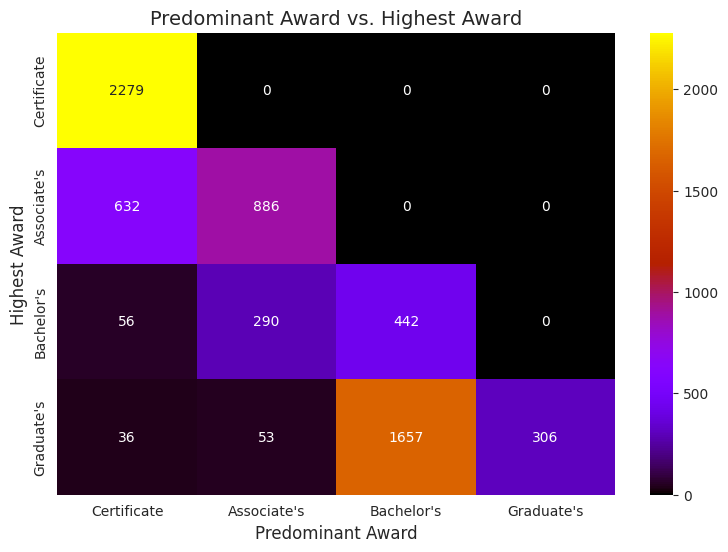

In [ ]:
# plot the shaped data with annotations
plt.figure(figsize = (9,6))
sb.heatmap(ct_counts, annot = True, fmt = '.0f',cmap = 'gnuplot')

# label
plt.title('Predominant Award vs. Highest Award', fontsize = 14)
plt.xlabel('Predominant Award', fontsize = 12)
plt.ylabel('Highest Award', fontsize = 12);

> - Institutes that offer a Certificate as their highest award also tend to have their predominant award as the same. There are 2259 such institutes that award Certificates only. <br><br>
> - Institutes that offer a Graduate's Degree as their predominant award tend to have their highest award as the same. There are 304 such schools that award Graduate Degrees exclusively. <br><br>
> - A Certificate is the most common award offered followed by a Bachelor's. <br><br>
> - Institutes that offer a Graduate's Degree as their highest award most commonly qualify as predominantly Bachelor's granting institutes.

_______________________________________________________________________________________________________________________________

#### Q. Which type of institutes with regards to their governance structure admit younger or older students? Is there is perceptible pattern?

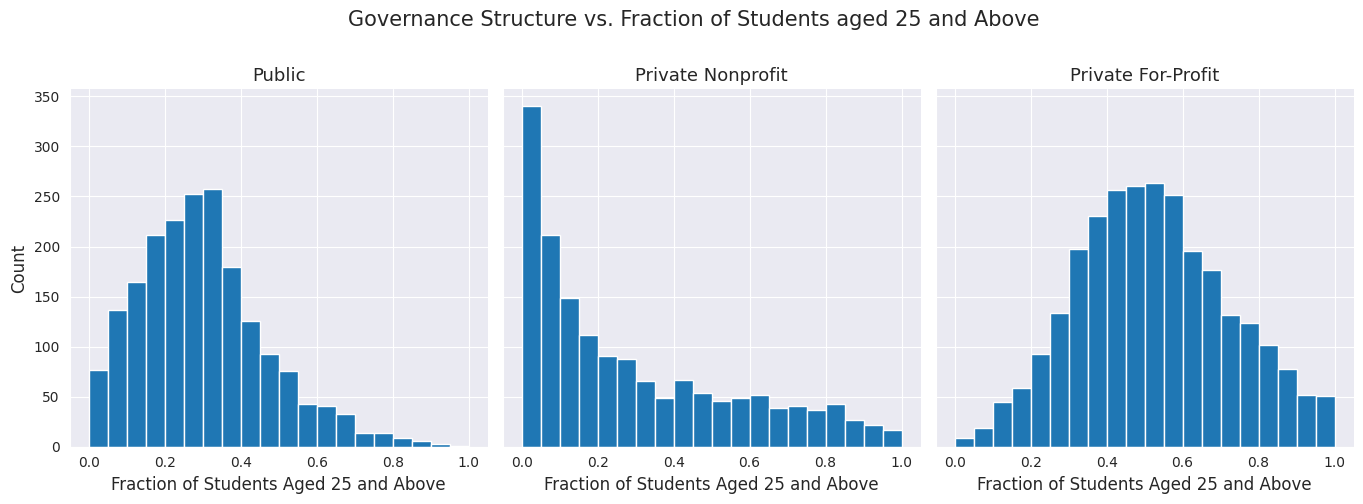

In [ ]:
sb.set_style('darkgrid')
# specify bins
bins = np.arange(0, 1 + 0.05, 0.05)

# create a FacetGrid object
g = sb.FacetGrid(data = df, col = 'control', height = 4.5)

# plot
g.map(plt.hist, 'ug25abv', bins = bins)

# label
g.set_titles('{col_name}', size = 13)
g.set_xlabels('Fraction of Students Aged 25 and Above', fontsize = 12)
g.set_ylabels('Count', fontsize = 12)
plt.suptitle('Governance Structure vs. Fraction of Students aged 25 and Above', fontsize = 15, x = 0.5, y = 1.1);

Lets calculate the median values:

In [ ]:
df.groupby('control').median()['ug25abv']

<ipython-input-68-1031d079e5e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('control').median()['ug25abv']


control
Public                0.2826
Private Nonprofit     0.1924
Private For-Profit    0.5071
Name: ug25abv, dtype: float64

> - For Public schools the median percentage for students aged twenty five and above is 28. <br><br>
> - For Private For-Profit schools the median percentage for students aged twenty five and above is 50. <br><br>
> - While Private Nonprofits have the youngest population of students with the median percentage of students aged twenty five and above being 19.

_______________________________________________________________________________________________________________________________

#### Q. Students in which type of institutes with regards to their governance structure are more likely to receive a federal loan?

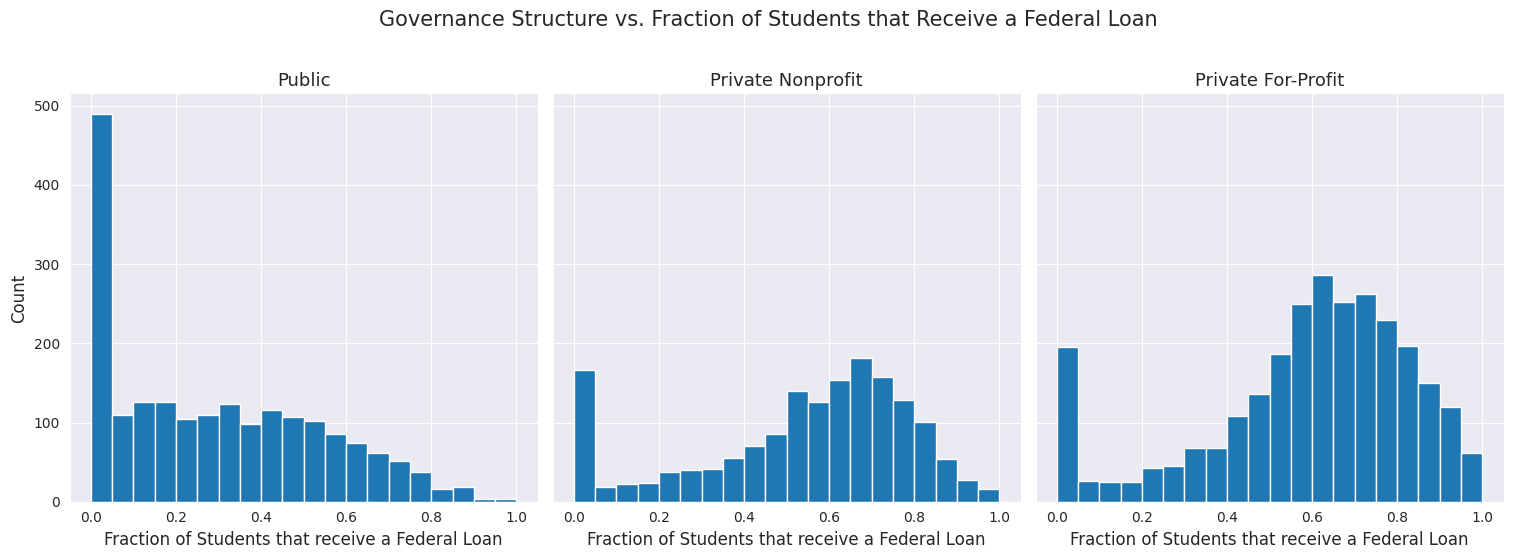

In [ ]:
# specify the bins
bins = np.arange(0, 1 + 0.05, 0.05)

# create a FacetGrid object
g = sb.FacetGrid(data = df, col = 'control', height = 5)

# plot
g.map(plt.hist, 'pctfloan', bins = bins)

# label
g.set_titles('{col_name}', size = 13);
g.set_xlabels('Fraction of Students that receive a Federal Loan', fontsize = 12)
g.set_ylabels('Count', fontsize = 12)
plt.suptitle('Governance Structure vs. Fraction of Students that Receive a Federal Loan', fontsize = 15, x = 0.5, y = 1.1);

In [ ]:
df.groupby('control').mean()['pctfloan']

<ipython-input-70-16e7a1a30e00>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('control').mean()['pctfloan']


control
Public                0.291467
Private Nonprofit     0.535592
Private For-Profit    0.589926
Name: pctfloan, dtype: float64

> - The distribution for Private Nonprofit and Private For-Profit institutes looks similar. We have taller bins for For-Profits owing to a greater number of such schools in the US. Generally speaking, a similar percentage of students from both these institutes receive a federal loan. <br><br>
> - Students from Public Schools are least likely to receive federal loans. A large fraction of students from these institutes do not receive a federal loan at all.

_______________________________________________________________________________________________________________________________

#### Q. How do faculty in Distance-only Institutes earn as compared to institutes that offer both Distance and On-campus education?

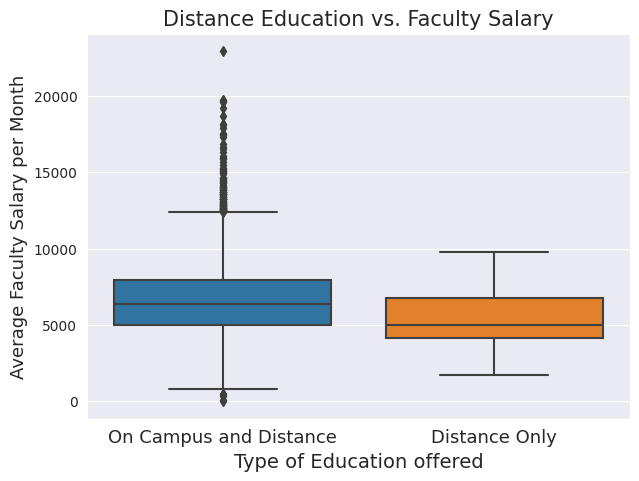

In [ ]:
# plot
plt.figure(figsize = (7, 5))
sb.boxplot(data = df, x = 'distanceonly', y = 'avgfacsal')

# rename tick labels
plt.xticks([0, 1], ['On Campus and Distance', 'Distance Only'], fontsize = 13)

# label
plt.title('Distance Education vs. Faculty Salary', fontsize = 15)
plt.ylabel('Average Faculty Salary per Month', fontsize = 13)
plt.xlabel('Type of Education offered', fontsize = 14);

> - We can see that on average the median salary of faculty in institutes that offer Distance-only education is about 1,500 less per month as compared to faculty from institutes that offer both Distance and On-campus learning. <br><br>
> - It is also worth noting that there is greater variability in the average faculty salary for institutes that offer On-campus education as compared to Distance-only institutes.

_______________________________________________________________________________________________________________________________

### Multivariate Explorations

Here we will look at the interaction of three or more variables simultaneously.

#### Q. One may think the institutes that admit students with higher SAT scores would have a low admission rate. Let's see if we can corroborate that with data.

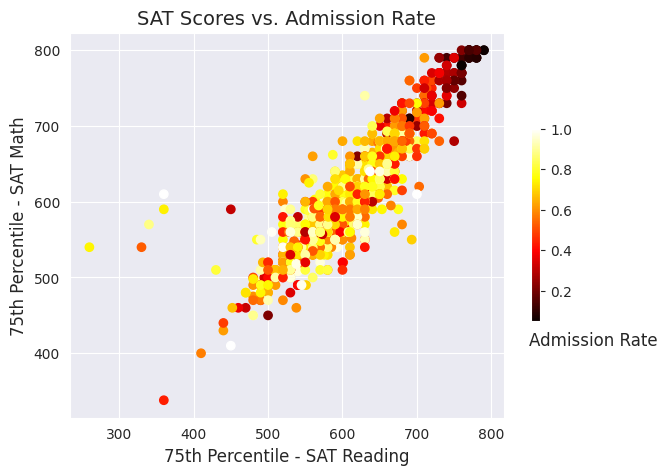

In [ ]:
# plot
plt.figure(figsize = (7, 5))
plt.scatter(data = df, x = 'satvr75', y = 'satmt75', c = 'adm_rate_all', cmap = 'hot')

# add a colorbar
plt.colorbar(shrink = 0.5)

# label
plt.title('SAT Scores vs. Admission Rate', fontsize = 14)
plt.xlabel('75th Percentile - SAT Reading', fontsize = 12)
plt.ylabel('75th Percentile - SAT Math', fontsize = 12)
plt.text(x = 850, y = 410, s = 'Admission Rate', size = 12);

> - We can see that our assumption was true. The dark datapoints on the upper right of the scatter plot represent the most selective institutes in the US. These institutes require higher SAT scores but even then have a very low admission rate. <br><br>
> - It is worh noting that there are certain datapoints on the lower side of the SAT spectrum that have a low admission rate. These institutes even though selective, do not necessarily require students to have high SAT scores.

_______________________________________________________________________________________________________________________________

#### Q. Does the 75th Percentile Score across all institutes correlate over different tests?

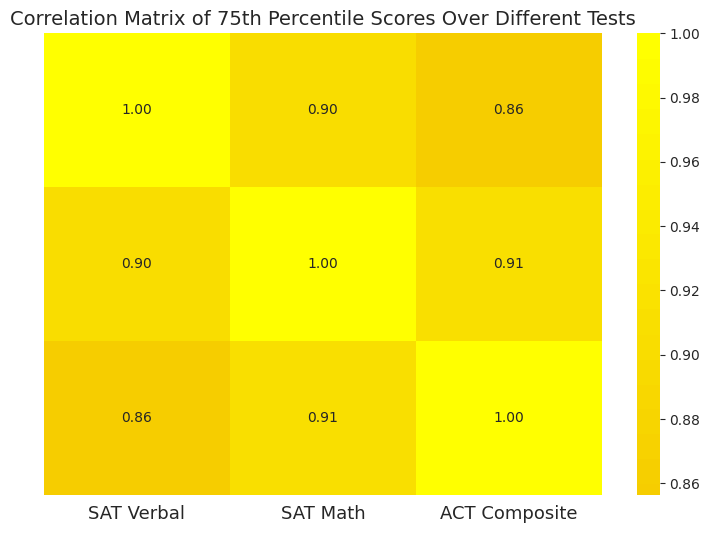

In [ ]:
plt.figure(figsize = (9, 6))

# separate out the columns of interest and rename appropriately
tests75 = df[['satvr75', 'satmt75', 'actcm75']].rename({'satvr75':'SAT Verbal', 'satmt75':'SAT Math',
                                                       'actcm75':'ACT Composite'}, axis = 'columns')
# plot
sb.heatmap(tests75.corr(),
            annot = True, fmt = '.2f', cmap = 'gnuplot', center = 0)

# adjust tick locations and fontsize
plt.yticks([0.2, 1.25, 2.1], fontsize = 13)
plt.xticks(fontsize = 13)

# label
plt.title('Correlation Matrix of 75th Percentile Scores Over Different Tests', fontsize = 14);

> - We can see there is a strong correlation between the 75th Percentile score on different tests across institutes. <br><br>
> - We can state that if a certain institute has a high 75th Percentile for any one of the tests, it is very likely that the 75th percentile for the other tests will be high as well.

_______________________________________________________________________________________________________________________________

#### Q. Which type of institutes with regards to governance structure see the highest number of undergraduate enrollments? What percentage of these students are aged 25 and above?

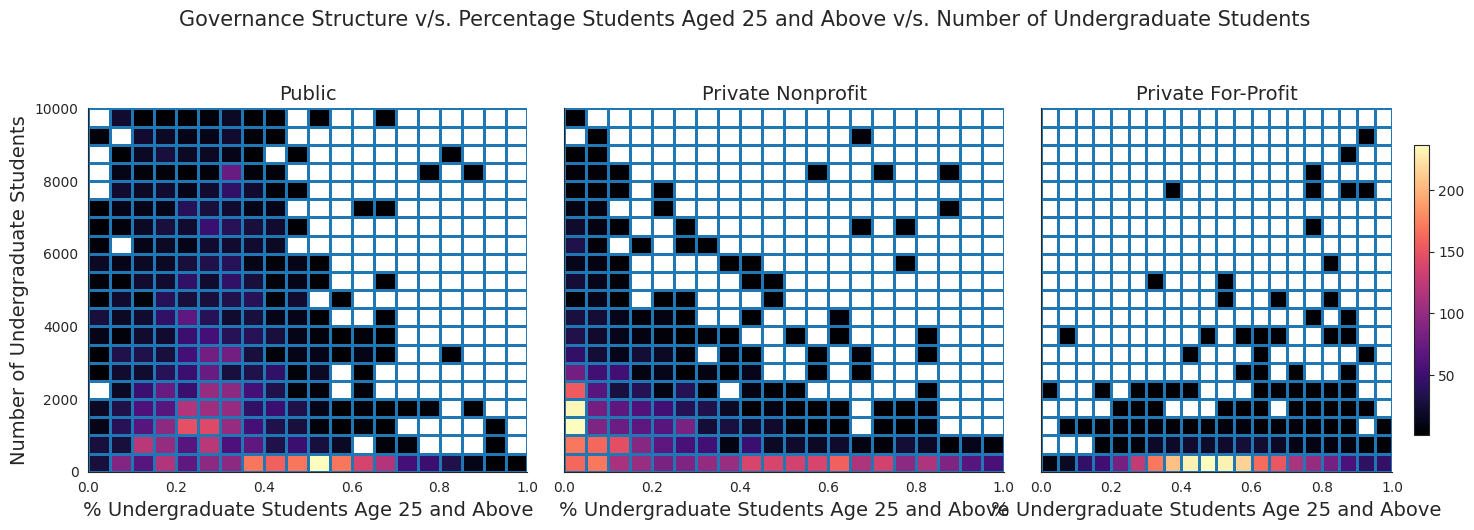

In [ ]:
sb.set_style('white')

# define bin sizes
bins_x = np.arange(0, 1 + 0.05, 0.05)
bins_y = np.arange(0, 10000 + 500, 500)

# create FacetGrid object
g = sb.FacetGrid(data = df.query('ugds<10000'),                    # ugds > 10000 are mostly Distance Only schools;
                                                                   # we are excluding them to observe a distinguishable pattern
                 col = 'control', height = 5, despine = True)

# Plot/Map FacetGrid Object
g.map(plt.hist2d, 'ug25abv', 'ugds', cmin = 0.5, cmap = 'magma', bins = [bins_x, bins_y])

# label
g.set_titles('{col_name}', size = 14)
g.set_xlabels('% Undergraduate Students Age 25 and Above', fontsize = 14)
g.set_ylabels('Number of Undergraduate Students', fontsize = 14)
plt.colorbar(shrink = 0.8)
plt.suptitle('Governance Structure v/s. Percentage Students Aged 25 and Above v/s. Number of Undergraduate Students',
             fontsize = 15, x = 0.5, y = 1.05)
plt.tight_layout();

In [ ]:
df.groupby(['control'])['ugds'].sum().reset_index(name = 'Total Number of Undergrads').merge(
df.groupby(['control'])['ug25abv'].mean().reset_index(name = 'Avg fraction of Undergrads Aged 25 and Above'))

,control,Total Number of Undergrads,Avg fraction of Undergrads Aged 25 and Above
0,Public,11551771.0,0.299600
1,Private Nonprofit,2783896.0,0.289852
2,Private For-Profit,1115951.0,0.521589


> - We can observe by far that the highest number of enrollments of Undergraduates happen in Public Schools. On average, 30% of these students are aged 25 and above. <br><br>
> - The youngest population on average can be seen in Private Nonprofits. <br><br>
> - Private For-Profits see comparatively few undergraduate enrollments. However, these institutes on average have the highest percentage of students aged 25 and above.

***

## Limitations

- For this analysis we have chosen to study the data for the academic year from Fall '17 to Fall '18. Some of the patterns that we saw here may not exist for other years. <br><br>
- Only 17% of the institutes in the dataset have reported data on their test scores. This puts severe limitations on our analysis where we try to answer the question "what qualifies as a good SAT or ACT score". <br><br>
- Similar is the case with data on Admission Rates where only about 32% of the schools have provided the data. This puts limitations on our analysis where we try to answer questions like "how do admission rates affect average faculty salary across schools" or when we visualize the distribution of admission rates. <br><br>
- A number of data fields such as Avg. Faculty Salary and Tuition Fee are average values. We perform our analysis on these average values. Needless to say, average experience isn't always the experienced average. <br><br>
- For the entire data for academic year 2017 - 18, we have chosen a subset of data fields to analyze. This analysis is in no way the complete picture of the U. S. Educational system.

***

## Conclusions

Here we will highlight the main findings of our survey of the U. S. Education System for the academic year Fall '17 to Fall '18.

#### General Observations
1. The State of California has by far the largest number of institutes (714). Of the Commonwealth/Territories only the District of Columbia and Puerto Rico have a significant number of institutes. The rest have a single institution each. <br>The distribution of institutes is irregular in the US with about 50% of the country's schools being concentrated in 10 States. <br><br>
2. Most schools in the US don't have branches, the median number being 1. Strayer University is at the opposite end of the spectrum having in total 73 branches spread across 16 States.<br><br>
3. The median faculty salary on average is 6,400 dollars per month.<br><br>

#### Academic Trends
1. From the limited data available we can say that a good SAT score falls in the range 500 - 600 for both Reading and Math while a good ACT Composite score can be anywhere between 20 and 26.<br><br>
2. Required Test Scores and Average Faculty Salary across schools have a weakly negative correlation with Admission Rate. Meaning, schools that have a high admission rate have lower requirements on test scores and tend to pay less to their faculty on average as compared to schools with lower rates of admission.<br><br>
3. Although the above trend is largely ubiquitous, there are some outlier institutes that have a low admission rate even though their requirements on test scores are relatively low. These institutes give less weightage to test scores while admitting students. <br><br>
4. Certificate Programs are the most common in the US followed by Bachelor's Degrees.<br><br>

#### Rise of Privatization of Education
1. About 11.5 million undergrads enrolled in Public Schools in Fall '17 as compared to 2.8 million in Private Nonprofits and 1.1 million in Private For-Profits.<br><br>
2. Even though the greatest number of enrollments happened in Public Institutions, Private For-Profit Schools are the most common in the US. There are about 30% more Private For-Profits than there are Public or Private Nonprofit Schools. <br><br>
3. The median revenue generated per student per year by institutes is about 9,000 dollars. 90% of schools that generate more than this are Private.<br><br>
4. On average about 90% more students from Private Schools receive federal loans than from Public Schools. Although this could be explained by the large number of students in Public Schools, it is an unjust discrepancy nonetheless.<br><br>